# Modeling and Simulation 4 - Data Clustering

Data clustering is a technique that is commonly used in data analysis and machine learning to identify patterns and relationships within large datasets. Clustering involves grouping data points together based on their similarities and differences, with the goal of creating clusters that are internally similar but distinct from one another.

The process of clustering involves several steps, including selecting a similarity metric and a clustering algorithm. The similarity metric defines how the similarity between two data points is measured. For example, if we are clustering data points that represent the preferences of online shoppers, we may use a similarity metric based on the products they purchased or the pages they visited on a website.

Once a similarity metric has been defined, we can use a clustering algorithm to group the data points into clusters. There are many different clustering algorithms available, each with its own strengths and weaknesses. Some of the most common algorithms include hierarchical clustering, k-means clustering, and density-based clustering.

There are many applications of clustering in various fields, including marketing, biology, computer science, and social sciences. For example, in marketing, clustering can be used to identify customer segments based on their preferences and behaviors. In biology, clustering can be used to group genes based on their expression profiles, which can help to identify genes that are co-regulated or that play similar roles in a biological process.

In computer science, clustering can be used for image segmentation, document clustering, and anomaly detection. In social sciences, clustering can be used to identify communities in social networks, group people based on their political views or other demographic characteristics, and to identify patterns in data from surveys or other sources.

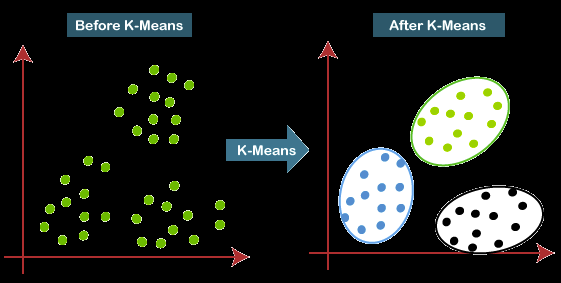

There are various types of clustering techniques available, and they can be broadly classified into the following categories:

- Partitioning Clustering: Partitioning clustering techniques divide the dataset into non-overlapping groups or partitions. The most common partitioning technique is the k-means clustering algorithm.

- Hierarchical Clustering: Hierarchical clustering creates a tree-like structure (dendrogram) to represent the relationships between the data points. It can be either agglomerative (bottom-up) or divisive (top-down).

- Density-based Clustering: Density-based clustering identifies clusters based on the density of data points in the feature space. The most popular density-based clustering technique is DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

- Grid-based Clustering: Grid-based clustering partitions the data space into a finite number of cells and clusters the data points within each cell. STING (Statistical Information Grid-based Clustering) and CLIQUE (CLustering In QUEst) are two popular grid-based clustering algorithms.

- Model-based Clustering: Model-based clustering assumes that the data points are generated from a statistical model and tries to estimate the parameters of the model. Expectation-Maximization (EM) is a popular model-based clustering technique.

Each of these clustering techniques has its advantages and disadvantages and may be more suitable for different types of datasets and applications. Here are a couple of applications of clustering in different fields:  

- Marketing: It can be used to characterize & discover customer segments for marketing purposes.
- Biology: It can be used for classification among different species of plants and animals.
- Libraries: It is used in clustering different books on the basis of topics and information.
- Insurance: It is used to acknowledge the customers, their policies and identifying the frauds.
- City Planning: It is used to make groups of houses and to study their values based on their geographical locations and other factors present. 
- Earthquake studies: By learning the earthquake-affected areas we can determine the dangerous zones. 

Alongside all these applications, Machine Learning is a field which extensively uses data clustering, especially for training purposes. One such example can be feature recognition in computer vision, where we need to create extremely large data bases for training purposes, with numerous features that can be found in images. However, clustering is not a swiss-knife of solutions, and there are use cases where data partitioning may be the preferred method (e.g. when we do not exactly know what features are we trying to extract, for example). An article which delves deeper into this subject can be found [here](https://www.explorium.ai/blog/clustering-when-you-should-use-it-and-avoid-it/).

## The Clustering Workhorse: K-means

K-means clustering is a popular unsupervised machine learning algorithm used to partition a set of n observations into k clusters. It is widely used in data mining, machine learning, image segmentation, and natural language processing.

The K-means algorithm is iterative and works by randomly selecting k points (called centroids) from the dataset, and then assigning each data point to the nearest centroid based on a distance metric. The most commonly used distance metric is Euclidean distance. Once all the data points have been assigned to a centroid, the centroid is recalculated as the mean of all the points in that cluster. This process is repeated iteratively until the centroids no longer change significantly, or until a specified number of iterations has been reached.

The K-means algorithm can be described in the following steps:

1. Initialize the centroids: The algorithm randomly selects k data points from the dataset as the initial centroids.

2. Assign data points to centroids: Each data point is assigned to the nearest centroid based on the Euclidean distance between the data point and the centroid.

3. Recalculate centroids: Once all data points have been assigned to centroids, the centroid positions are updated as the mean of all the data points assigned to it.

4. Repeat steps 2 and 3 until convergence: Steps 2 and 3 are repeated until the centroids no longer change significantly, or until a specified number of iterations has been reached.

5. Output the final clusters: After convergence, the final clusters are formed by grouping together the data points that are assigned to each centroid.

The K-means algorithm has several advantages, including its simplicity, efficiency, and scalability. It is computationally efficient and can handle large datasets with many variables. K-means is also easy to interpret, as the resulting clusters are represented by the centroids and are therefore easy to visualize.

However, K-means also has some limitations. It assumes that the clusters are spherical and equally sized, and that the distance metric used is Euclidean distance. Additionally, K-means can be sensitive to the initial random selection of centroids and may converge to a local minimum rather than the global minimum.

In [1]:
import random
import numpy as np

class KMeans:
    def __init__(self, k=3, max_iter=100):
        """
        Constructor method for KMeans class. Initializes k and max_iter attributes.
        """
        self.k = k
        self.max_iter = max_iter
    
    def fit(self, X):
        """
        Method that performs k-means clustering on the input data.

        Parameters:
        X (numpy array): Input data to cluster.
        """
        self.centroids = np.random.randn(self.k, X.shape[1])
        # TODO randomly initialize centroids
        # NOTE: Try to make this code size-invariant. The points that you need to cluster can be 1D, 2D, or however many dimensions are provided in the received data

        # repeat until convergence or max iterations are reached
        for i in range(self.max_iter):
            # initialize empty clusters
            clusters = [[] for _ in range(self.k)]
            self.labels = []
            
            # TODO assign data points to closest centroid
            for x in X:
                min = -1
                target_centroid = 0
                # 1. calculate distances to all centroids
                for j in range(self.k):
                    dist = 0
                    for l in range(X.shape[1]):
                        dist = dist + (self.centroids[j][l] - x[l]) ** 2
                    dist = np.sqrt(dist)
                # 2. find the closest centroid
                    if min == -1 or min > dist:
                        min = dist
                        target_centroid = j
                # 3. add the point ot the cluster of the closest centroid
                clusters[target_centroid].append(x)
                self.labels.append(target_centroid)
                continue

            # TODO calculate new centroids as mean of each cluster
            # hint: to have a robust code, we should check if the cluster is empty or not
            for j in range (self.k):
                self.centroids[j] = np.mean(clusters[j], axis=0)
        
        # TODO assign labels to each data point based on its closest centroid


        # no need to return, to get the corresponding clusters you need to check with KMeans.labels

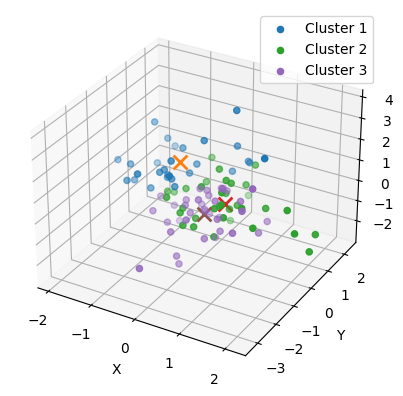

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some 3D data
np.random.seed(42)
X = np.random.randn(100, 3)

# Run K-means clustering with k=3
kmeans = KMeans(k=3)
kmeans.fit(X)

# Visualize the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(kmeans.k):
    # Plot data points for each cluster with different colors
    ax.scatter(X[[label == i for label in kmeans.labels], 0], X[[label == i for label in kmeans.labels], 1], X[[label == i for label in kmeans.labels], 2], label='Cluster {}'.format(i+1))
    # Plot centroids for each cluster
    ax.scatter(kmeans.centroids[i][0], kmeans.centroids[i][1], kmeans.centroids[i][2], marker='x', s=100, linewidths=2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

Note: if you can not rotate the figure within the notebook, try to run the code as a normal Python script outside Jupyter.

To compare your results to a library implementation of K-means, you can use the `sklearn` package: `from sklearn.cluster import KMeans`. Keep in mind that each clustering run may produce other cluster groups and centroids.

## Spectral Clustering

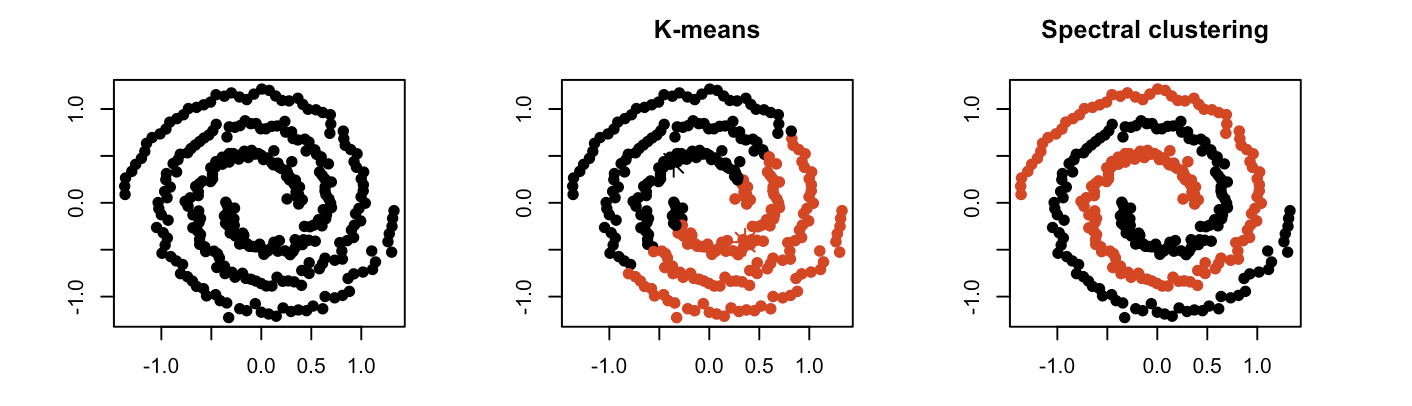

Spectral clustering is a clustering algorithm that groups data points based on their similarity in a transformed space. Instead of directly clustering data points in the original space, spectral clustering transforms the data into a lower-dimensional space using eigenvectors and eigenvalues of a similarity matrix. This transformation allows spectral clustering to capture non-linear relationships between data points that cannot be easily modeled by traditional clustering algorithms.

Spectral clustering is commonly used in various applications, such as image segmentation, social network analysis, and natural language processing. It is particularly useful when dealing with high-dimensional data or when the data has a non-linear structure.

Spectral clustering is often preferred over k-means clustering when the data is not well-separated or when the clusters have non-convex shapes. K-means clustering is based on the assumption that the clusters are spherical and well-separated, which may not hold true in many real-world datasets. Spectral clustering, on the other hand, can capture complex relationships between data points and can handle clusters with arbitrary shapes.

One disadvantage of spectral clustering is that it can be computationally expensive, especially for large datasets. Additionally, determining the optimal number of clusters can be difficult, and the results of spectral clustering can be sensitive to the choice of parameters and the similarity measure used.

To implement a spectral clustering algorithm, the following steps are typically taken:

1. Construct a similarity matrix between the data points. The choice of similarity measure depends on the specific application and data type.
2. Compute the graph Laplacian of the similarity matrix.
3. Compute the eigenvectors and eigenvalues of the Laplacian matrix.
4. Use the eigenvectors to embed the data into a lower-dimensional space.
5. Apply a traditional clustering algorithm, such as k-means, to the embedded data to obtain the final clusters.

To construct the similarity matrix `W`, we use the following formula:

$$W_{i,j} = exp(-\frac{|x_i - x_j|^2}{2 \sigma^2})$$

where $\sigma$ - the scaling factor which controls the width of the Gaussian kernel, is a parameter of our clustering algorithm. The Gaussian kernel assigns a high similarity between two points that are close to each other, and a low similarity between two points that are far apart.

To construct the adjacency matrix, we compute the pairwise similarities between all pairs of points using the Gaussian kernel formula, and then threshold the similarities to only keep the k-nearest neighbors. This is done to ensure that the resulting adjacency matrix is sparse and computationally efficient to work with.

After computing the adjacency matrix, we can construct the degree matrix $D$ and the Laplacian matrix $L$ as follows:

$$D_{i,i} = \sum_j{W_{i,j}}$$

$$L = D - W$$

In this context, $D_{i,i}$ is the sum of similarities between point $i$ and all other points.

The Laplacian matrix is a key component in spectral clustering because it captures the pairwise distances between the points in a way that can be used to cluster them. The Laplacian matrix is typically computed using the unnormalized Laplacian, but there are also normalized versions of the Laplacian that can be used.

After we compute the first `n_clusters` eigenvectors of the Laplacian matrix, and we concatenate them as a matrix V, we need to normalize the rows of matrix V, after which we can use the K-means algorithm on the resulting normalized V matrix, and get our spectral clustering.

In [2]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

def spectral_clustering(points, n_clusters, sigma, k):
    """
    Implements spectral clustering for a 3D point cloud.

    Args:
    - points: a numpy array of shape (n, 3) containing the 3D coordinates of the points
    - n_clusters: the number of clusters to identify
    - sigma: a scalar value for the width of the Gaussian kernel
    - k: the number of nearest neighbors to use for constructing the adjacency matrix

    Returns:
    - a numpy array of shape (n,) containing the cluster assignments for each point
    """
    # construct the adjacency matrix using a Gaussian kernel
    dists = cdist(points, points, 'euclidean')
    W = np.exp(-dists ** 2 / (2 * sigma ** 2))
    # set diagonal entries to zero
    np.fill_diagonal(W, 0)

    # construct the degree matrix
    D = np.diag(np.sum(W, axis=1))

    # construct the Laplacian matrix
    L = D - W

    # compute the first n_clusters eigenvectors of the Laplacian matrix
    _, eigvecs = np.linalg.eigh(L)
    V = eigvecs[:, :n_clusters]

    # normalize the rows of V
    norms = np.linalg.norm(V, axis=1)
    V = V / norms[:, np.newaxis]

    # cluster the rows of V using k-means
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(V)
    labels = kmeans.labels_

    return labels



/home/adi/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


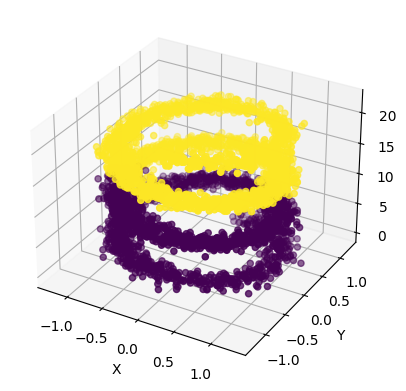

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# set the number of points and noise
n = 2000
noise = 0.1

# generate double helix points
t = np.linspace(0, 2*np.pi*3, n)
x = np.sin(t)
y = np.cos(t)
z = t
spiral1 = np.vstack([x, y, z]).T
t = np.linspace(0, 2*np.pi*3, n) + np.pi
x = np.sin(t)
y = np.cos(t)
z = t
spiral2 = np.vstack([x, y, z]).T
points = np.vstack([spiral1, spiral2]) + np.random.normal(scale=noise, size=(2*n, 3))

# apply spectral clustering to the points
n_clusters = 2
sigma = 0.5
k = 20
labels = spectral_clustering(points, n_clusters, sigma, k)

# plot the points colored by cluster
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:,0], points[:,1], points[:,2], c=labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

To compare your code against a library implementation of Spectral Clustering, you can use the `SKLearn` library again: `from sklearn.cluster import SpectralClustering`. Unlike K-means, the clusters recognized with spectral clustering should be roughly the same for each run.